# Import Statements

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

In [79]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla


<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [80]:
df_tesla.head()
df_tesla.shape
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [81]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [82]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [83]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [84]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [85]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [86]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [87]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [88]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [89]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price.shape

Number of missing values: 2


(2204, 3)

Remove any missing values that you found.

In [90]:
df_btc_price.dropna(inplace=True)


### Convert Strings to DateTime Objects

Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames.

In [91]:
type(df_tesla.MONTH[0])
type(df_btc_search.MONTH[0])
type(df_btc_price.DATE[0])
type(df_unemployment.MONTH[0])

str

In [92]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)


In [93]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [94]:
df_btc_monthly = df_btc_price.resample('ME', on = 'DATE').last()

In [97]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

### Tesla Stock Price v.s. Search Volume

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

In [120]:
years = mdates.YearLocator()
months = mdates.MonthLocator( )
years_fmt = mdates.DateFormatter('%Y')

To add tick formatting for dates on the x-axis.

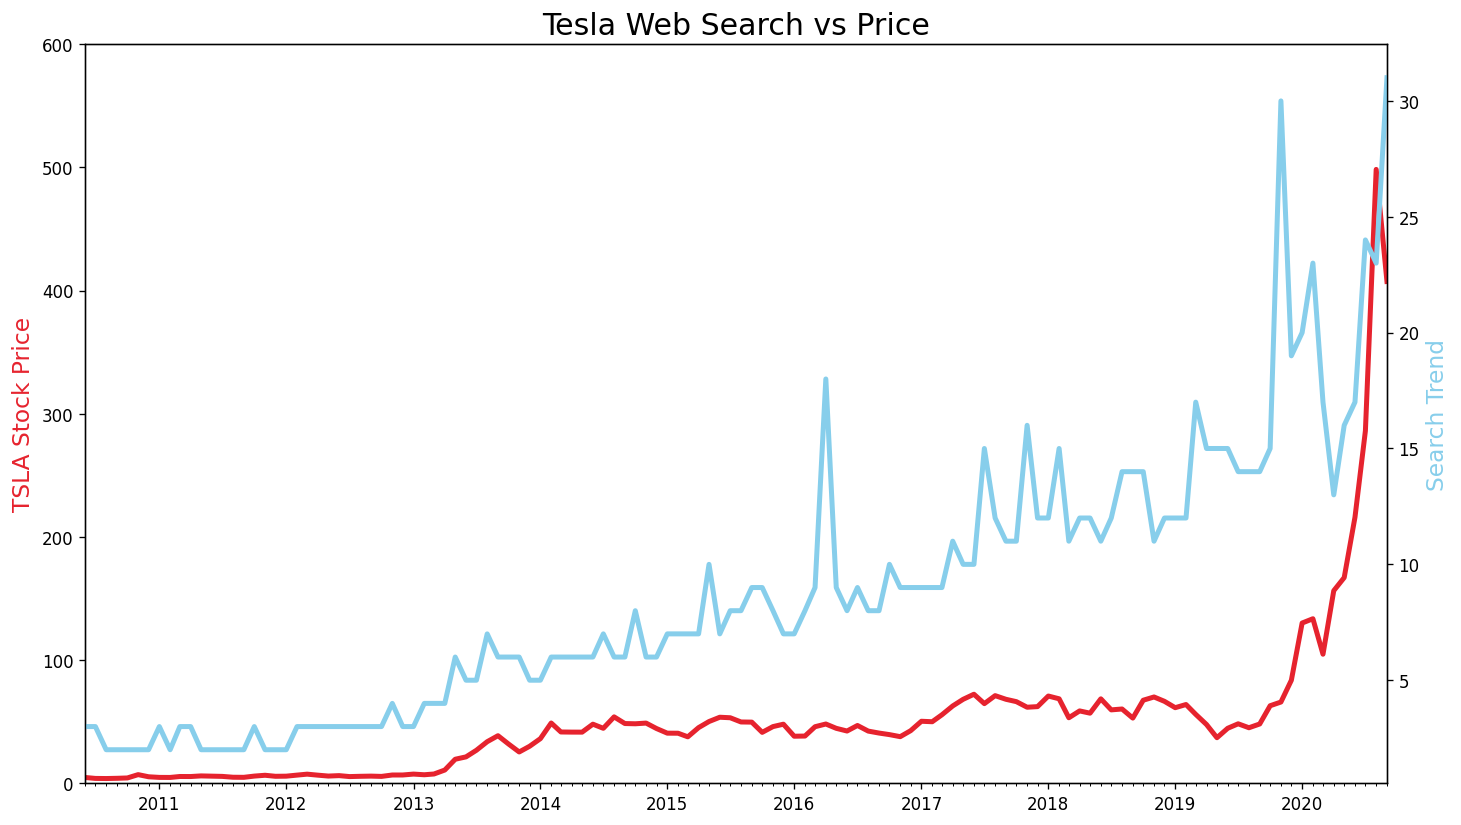

In [121]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('TSLA Stock Price', color = '#E6232E', fontsize = 14)
ax2.set_ylabel('Search Trend',  color='skyblue', fontsize = 14)
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = '#E6232E', linewidth = 3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth = 3)


The tick marks allows us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!

### Bitcoin (BTC) Price v.s. Search Volume

Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Make the BTC price a dashed line <br>
5. Make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [126]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [128]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


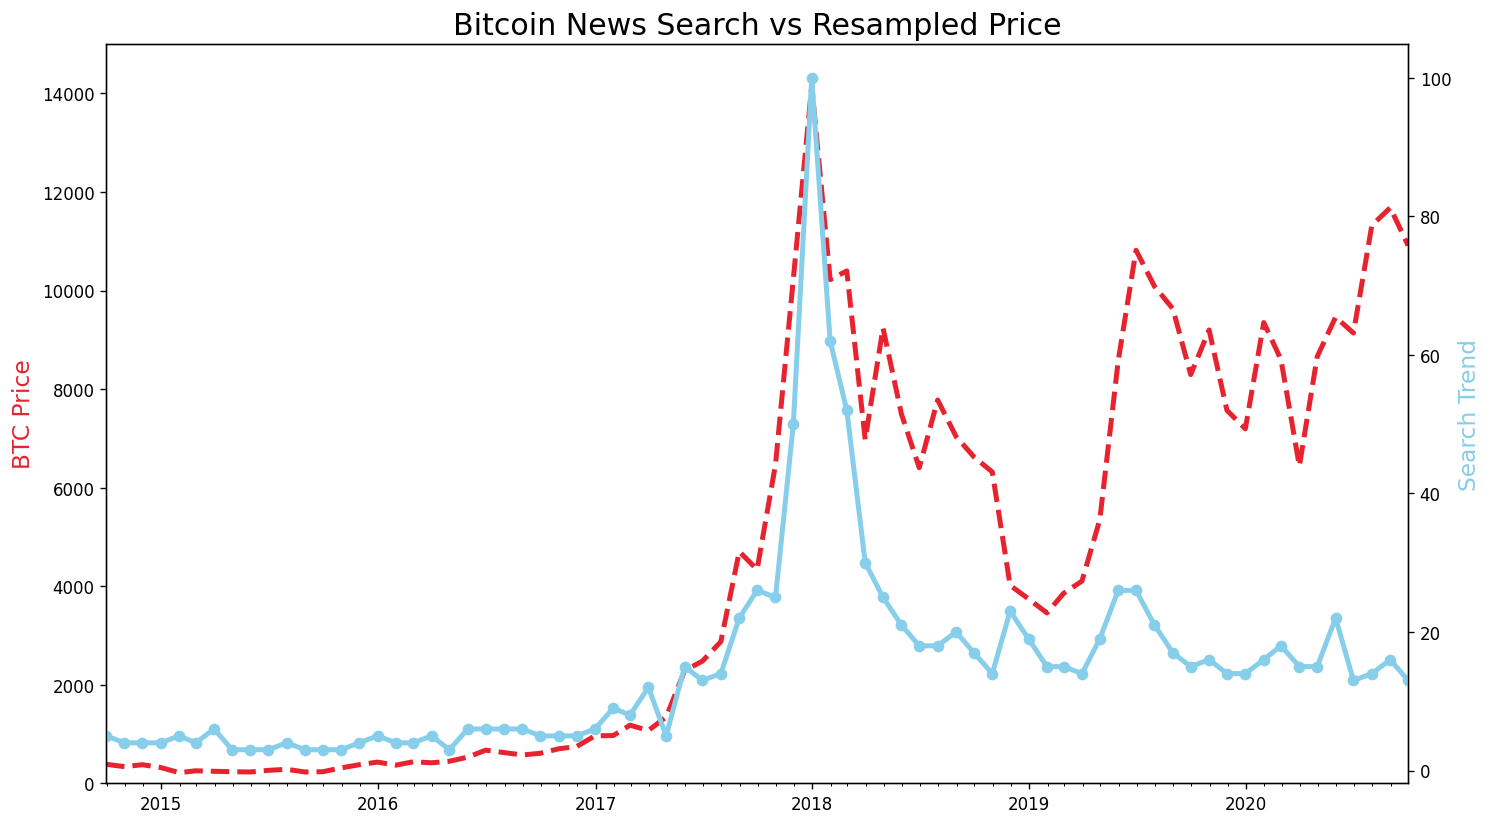

In [130]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('BTC Price', color = '#E6232E', fontsize = 14)
ax2.set_ylabel('Search Trend',  color='skyblue', fontsize = 14)
ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color = '#E6232E', linewidth = 3, linestyle = '--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth = 3, marker = 'o')

The crazy price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Plot the search for "unemployment benefits" against the unemployment rate.
1. The title is: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grid to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [134]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


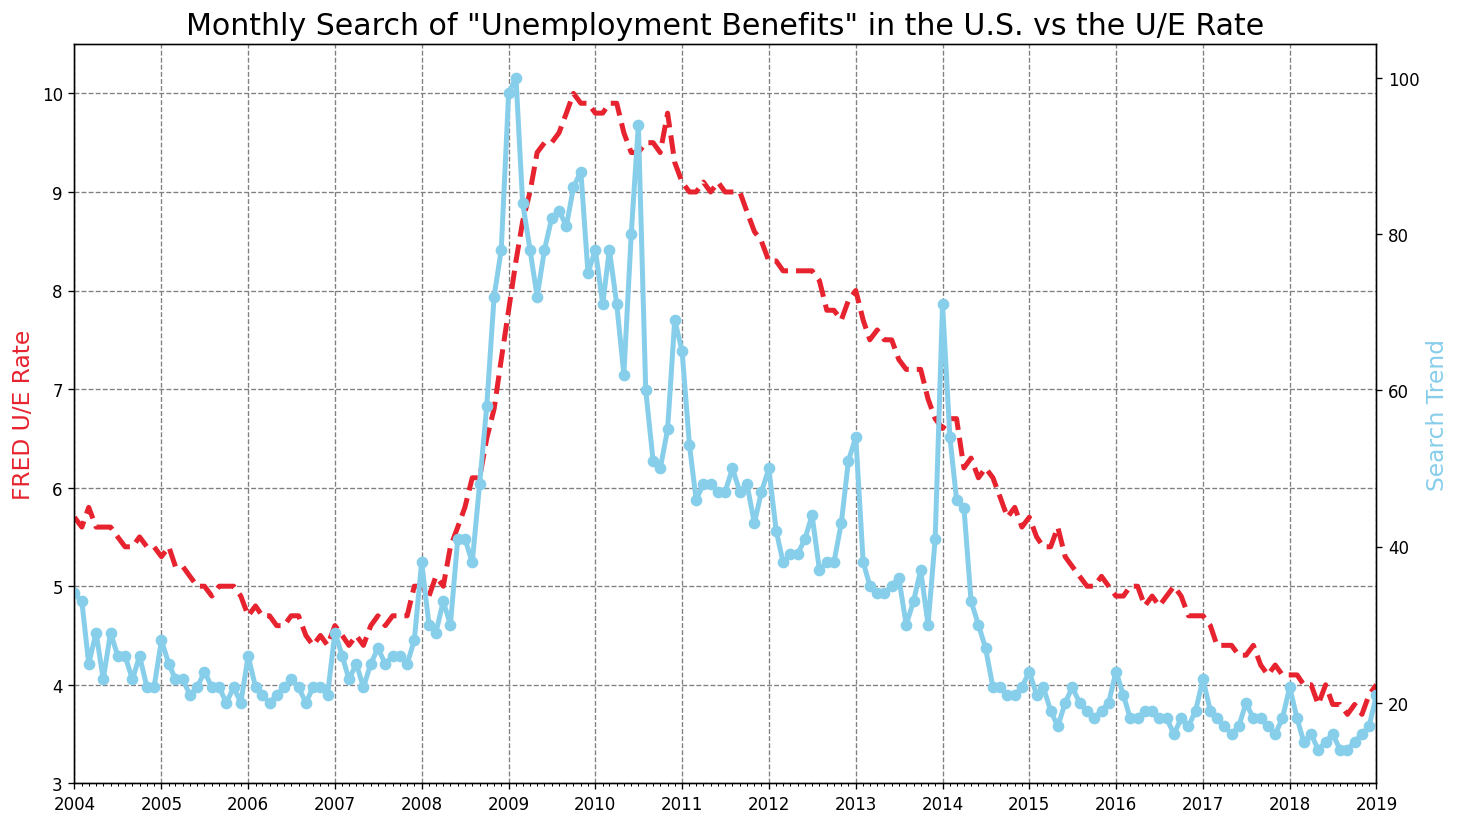

In [137]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('FRED U/E Rate', color = '#E6232E', fontsize = 14)
ax2.set_ylabel('Search Trend',  color='skyblue', fontsize = 14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.grid(color='grey', linestyle='--')
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color = '#E6232E', linewidth = 3, linestyle = '--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth = 3, marker = 'o')

We can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis

Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


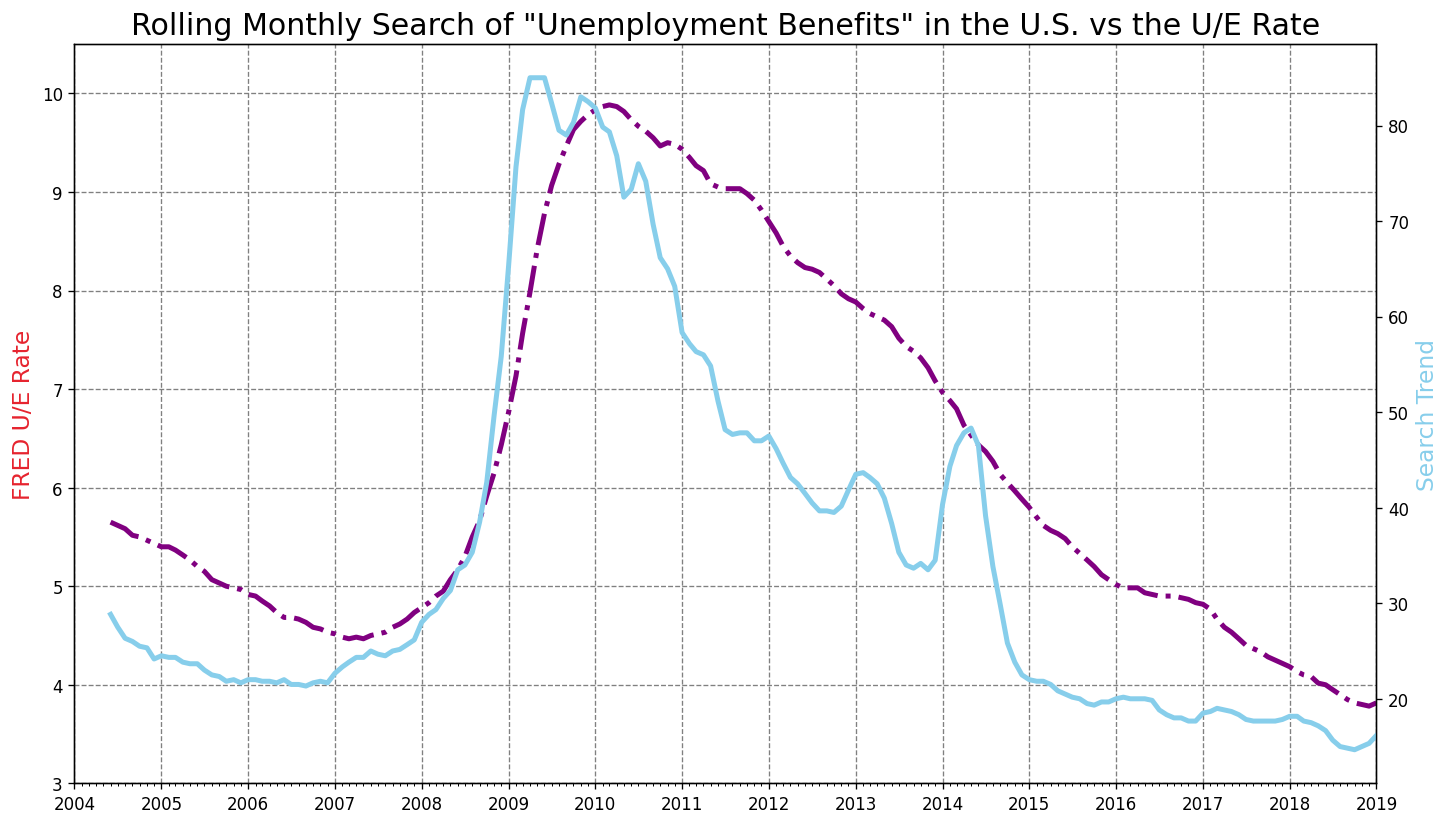

In [138]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color = '#E6232E', fontsize = 14)
ax2.set_ylabel('Search Trend',  color='skyblue', fontsize = 14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.grid(color='grey', linestyle='--')

#Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

### Including 2020 in Unemployment Charts

Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [139]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

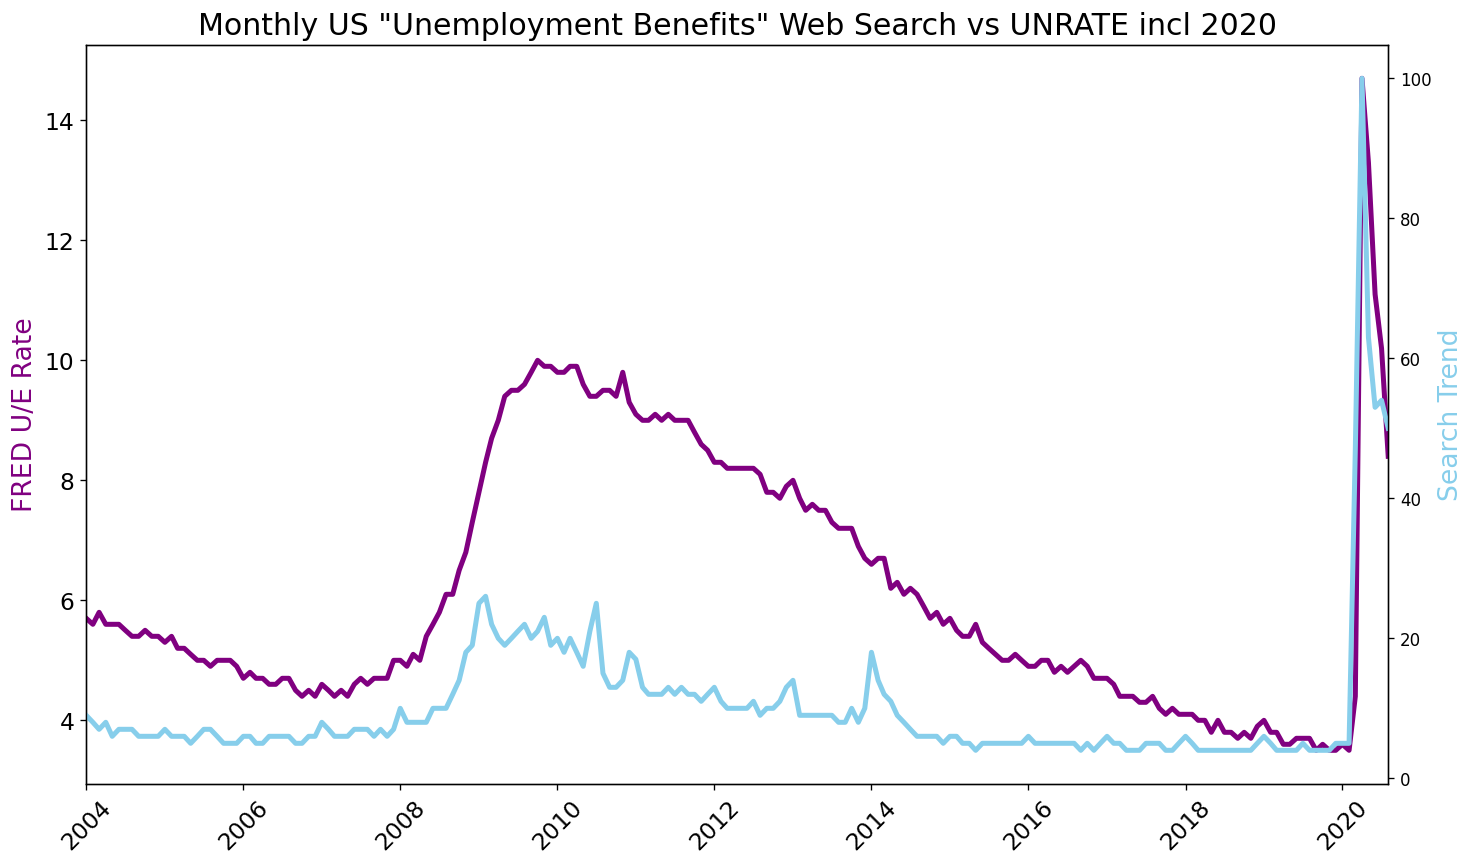

In [140]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis.